<a href="https://colab.research.google.com/github/tttyoung/hongong_machine_study1/blob/main/week05/%EC%9E%84%EB%B3%91%ED%9A%8C/Chapter06/%ED%98%BC%EA%B3%B5%EB%A8%B8_06_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2025-11-15 07:01:19--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-15 07:01:19--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-15 07:01:19--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

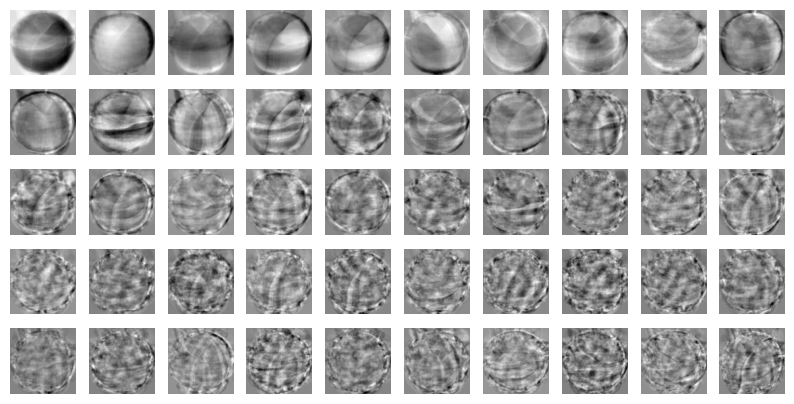

(300, 50)
(300, 10000)


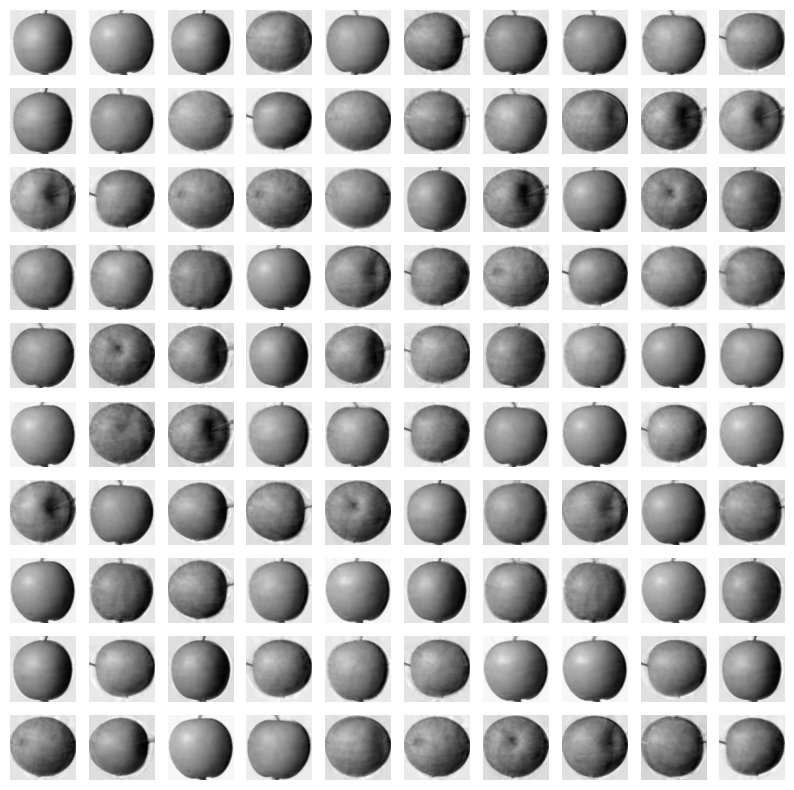

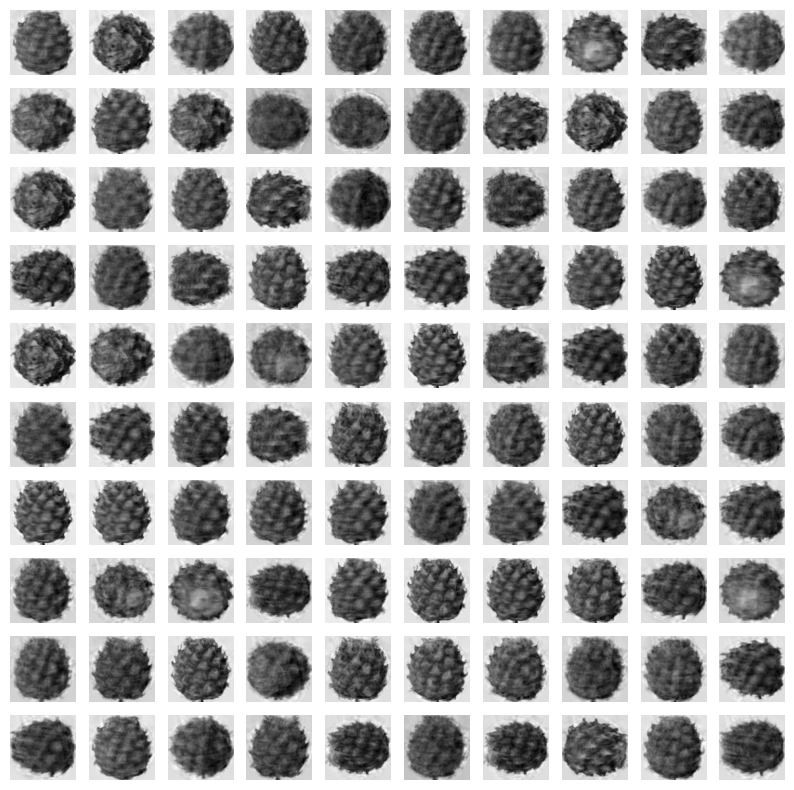

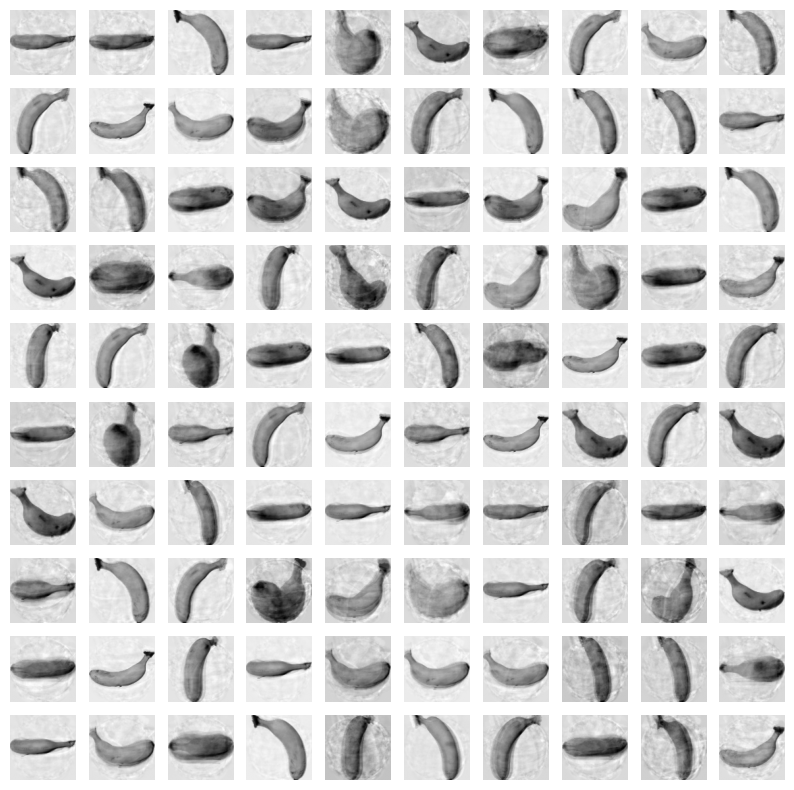



0.9214470557034586


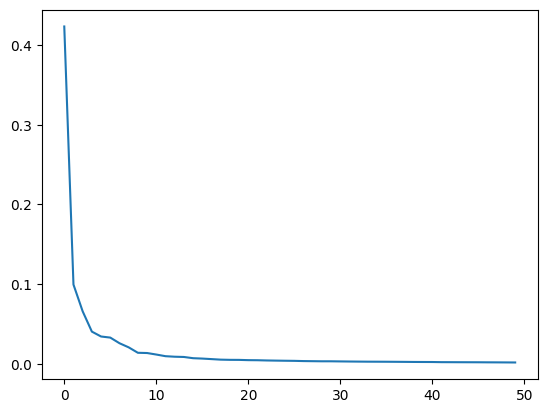

0.9966666666666667
1.07195725440979
0.9966666666666667
0.022071313858032227
2
(300, 2)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.99
0.04962034225463867
(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


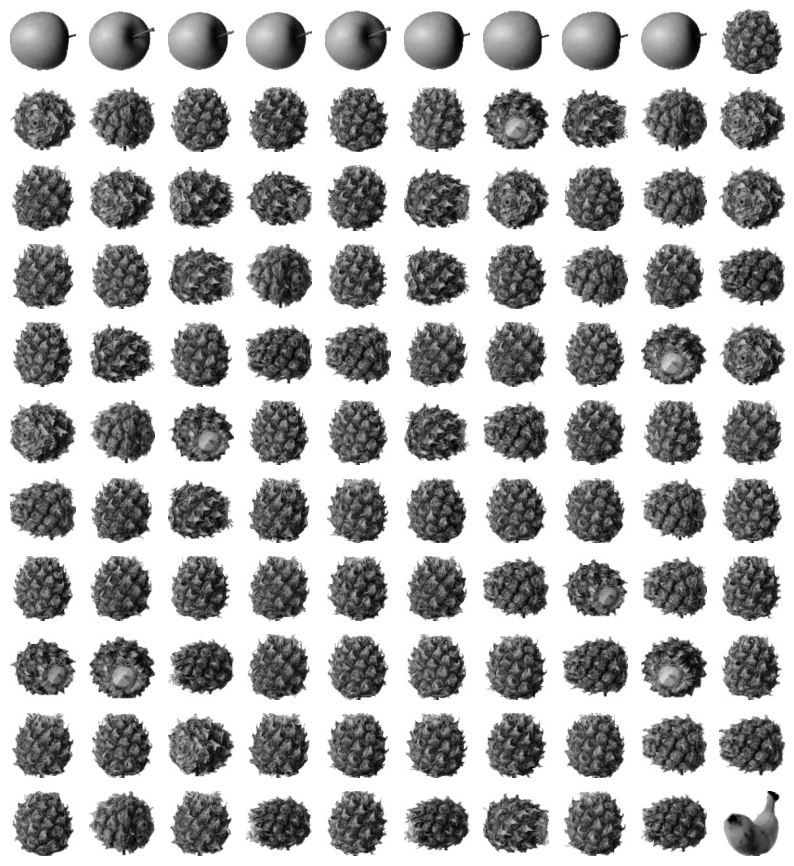

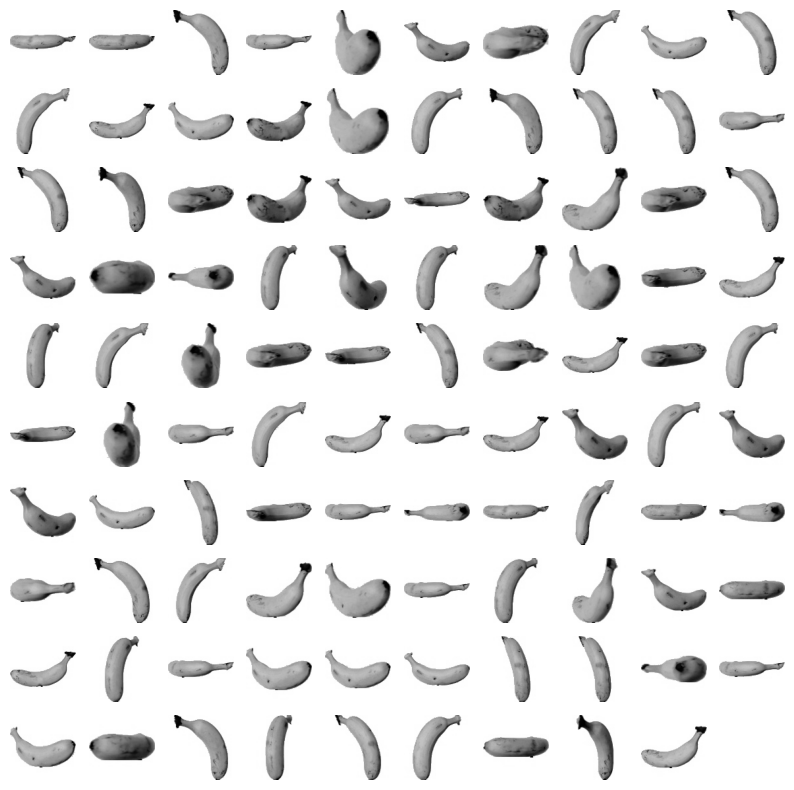

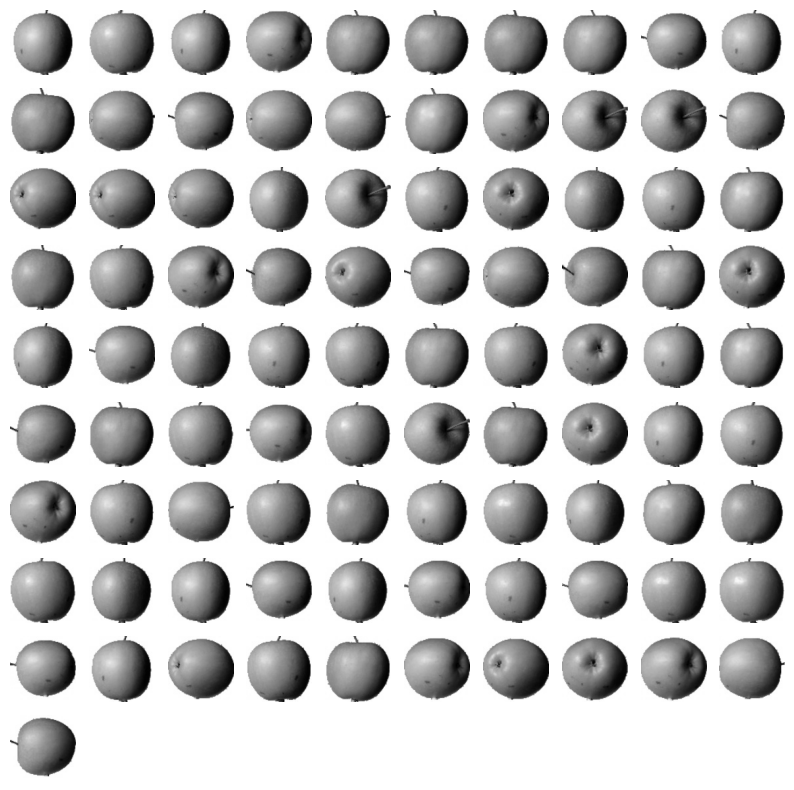

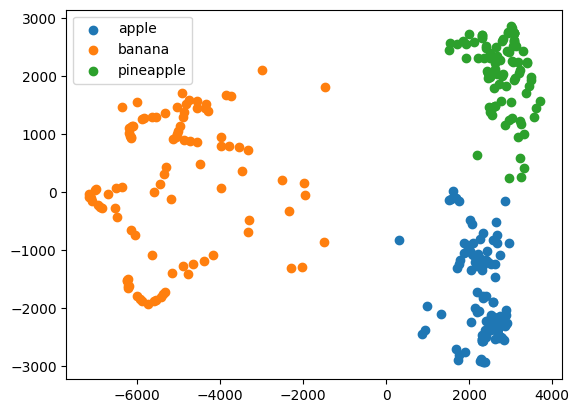

In [15]:
# 데이터
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)
# 배열 크기 확인
print(pca.components_.shape)
# 주성분 50 이미지 출력
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows <2 else 10
  fig, axs = plt.subplots(rows, cols,
                          figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10+j < n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()
draw_fruits(pca.components_.reshape(-1,100,100))
# 원본 주성분 50으로 축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
# 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)
# 복원 사진 출력
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")
# 설명된 분산
print(np.sum(pca.explained_variance_ratio_))
# 적절 주성분 개수 찾기
plt.plot(pca.explained_variance_ratio_)
plt.show()
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
# 타깃값 설정
target = np.array([0]*100+[1]*100+[2]*100)
# 원본 데이터 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# pca 교차 검증
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 설명된 분산 50퍼에 달하는 주성분 찾기
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)
# 주성분 2개로 원본 데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 차원 축소 데이터로 k-평균 알고리즘
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))
# 이미지 출력
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")
# 클러스터 별 산점도
for label in range(0,3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()